
# Predicting How Many Installs Our Application May Have

The Applications' Market for Android OS is fast growing in the past few years.<br>
In this project, we are working for a development team that wants to create a popluar app which will capture a niche in the Android market.<br>
We will explore the features of the applications in "Google Play" store and create a model that predicts the number of installs for each app.
Direct link to the project: [GooglePlay Project](GooglePlayFinalProject.ipynb)

## Summary Of Results

- Although 90% of apps are free of charge, users tend to pay for apps from genres Tools, Entertainment and Education.<br>
- 50% of apps were installed each more than 1M times. We suggest our development team to aim for installing their app 1M or more times in order to define the success of app. <br>
- The most popular genres are: Communication, Productivity, Social, Tools and Arcade.
- Strategy games are the most reviewed among all genres.
- On average, around 6% of users who download an app write reviews in the Google Play Store.
- Liniar regression algorithm with certain genres as features has the best performance while predicting the apps' installs among the examined alternatives.

For more details, please refer to the full analysis below.


# The Dataset

We will work with a web scraped dataset from "kaggle.com" website that consists of 10,841 "Google-Play" Store apps for analyzing the Android market.<br>
Here you can find an attached link for this dataset: https://www.kaggle.com/lava18/google-play-store-apps


In [1]:
#Read in the file
import pandas as pd
raw_google_play=pd.read_csv(r'C:\Users\Elad\Desktop\Datasets\google play\googleplaystore.csv')

In [2]:
#Display the first rows of our raw dataset and its dimensions for exploration. 
print("Number of rows & columns in raw dataset are:\n ")
print(raw_google_play.shape)
raw_google_play.head()

Number of rows & columns in raw dataset are:
 
(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


    
# Data Cleaning

## Removing Non-English Apps

Since our analysis towards to English-speaking audience and we ,also, want to minimize data loss, We’re not interested in keeping apps with more than 3 chars which aren't used in ASCII standard.


In [3]:
#Function that returns False if the string has more than 3 non-ASCII chars, otherwise returns True
def is_english(string):
    non_ascii = 0

    for character in string:
        if ord(character) > 127:
            non_ascii += 1

    if non_ascii > 3:
        return False
    else:
        return True

#Remove The Non-English Apps From Raw Data    
raw_google_play=raw_google_play[raw_google_play['App'].apply(is_english)].copy()
print("There are {0} english apps in our database".format(len(raw_google_play)))

There are 10796 english apps in our database


## Removing Null Values
We need to prepare our data for numeric analysis, hence we should deal with the NULL values in our dataset rows and columns. 

In [4]:
#Count the null values for each column.
raw_google_play.isnull().sum(axis = 0)

App                  0
Category             0
Rating            1459
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

The "Rating" column contains 1459 Nun values, which is about 14% of total number of rows.<br>
Because it's relativly high percentage, we will replace the null values with column's average.<br>

In [5]:
#Replace the null values in "Rating" column with its mean.
import numpy as np
processed_google_play=raw_google_play.copy()
rating_mean=np.nanmean(processed_google_play["Rating"])
processed_google_play["Rating"].fillna( rating_mean, inplace = True) 

In [6]:
#Present the apps including missing values.
missing_values=processed_google_play[processed_google_play['Type'].isnull() | processed_google_play['Content Rating'].isnull() | processed_google_play['Current Ver'].isnull() | processed_google_play['Android Ver'].isnull()]
missing_values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.400000,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.500000,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.193124,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.193124,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.193124,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,4.193124,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There are only 12 apps with missing values. Before deleting those apps, we need to make sure that the installs' volume of those apps is relatively neglectable. 

In [7]:
#Distribution of installs for rows with null values.
missing_values['Installs'].value_counts().sort_index()

0             1
1,000+        2
1,000,000+    1
10+           1
10,000+       2
100+          1
5,000+        1
50,000+       1
500,000+      1
Free          1
Name: Installs, dtype: int64

In [8]:
#Distribution of installs for all rows in dataset.
processed_google_play['Installs'].value_counts().sort_index()

0                    1
0+                  13
1+                  66
1,000+             900
1,000,000+        1576
1,000,000,000+      58
10+                385
10,000+           1045
10,000,000+       1252
100+               714
100,000+          1162
100,000,000+       409
5+                  82
5,000+             474
5,000,000+         750
50+                205
50,000+            473
50,000,000+        289
500+               330
500,000+           539
500,000,000+        72
Free                 1
Name: Installs, dtype: int64

The apps with missing values have 2M installs, whereas all apps have above 58B installs.
Hence, we can remove those rows.

In [9]:
#Remove rows with null values
processed_google_play=processed_google_play.drop(index=missing_values.index)

## Removing Redundant Chars From Columns

Having in our mind the numeric analysis needs to be done, we want now to remove redundant chars from specific columns, and then convert their values to numeric.<br>

### Processing The "Size" Column
We can see that the values in this column are shown in kilobypes or megabytes alternatively.<br>
Since we want to show this field as one-scaled unit, we will convert its values to megabytes. <br>
Each value has an additional letter :"M" represents 1 megabyte and "k" represents 1 kilobyte.<br>
Let's create additional column "Size(MB)" and fill it as followed:<br>
* If the number in "Size" column has "M", we will add this value as is to the corresponded "Size(MB)" value.<br>
* If the number in "Size" column has "k", we will divide this number by 1000 and assign the result to the corresponded "Size(MB)" value.<br>
* Otherwise the size varies with device and we will assign np.nan as its value.<br>
Finally, we will drop the old column "Size" because we don't need it anymore.<br>

In [10]:
#Create new column that shows the size of apps in MB units as followed:
# 1. Nun value if the apps' size varies with device.
# 2. The size remained the same if the apps' size is measured in MB (last letter is "M")
# 3. The size is divided by 1000 if the apps' size is measured in kilobytes (last letter is "k")
size_last_letter=processed_google_play['Size'].astype(str).str[-1]
processed_google_play.loc[size_last_letter=='k','Size(MB)']=processed_google_play.loc[size_last_letter=='k','Size'].astype(str).str[:-1].astype(float)*1/1000
processed_google_play.loc[size_last_letter=='M','Size(MB)']=processed_google_play.loc[size_last_letter=='M','Size'].astype(str).str[:-1].astype(float)
processed_google_play.loc[size_last_letter=='e','Size(MB)']=np.nan

In [11]:
#Drop the old "Size" column
processed_google_play=processed_google_play.drop(columns=['Size'])

In [12]:
#Calculate number of apps that their size varies with device
vary_with_device_apps=len(processed_google_play.loc[size_last_letter=='e','Size(MB)'])
total_apps=len(processed_google_play)
print("There are {0} apps ({1:.1f}%) that vary with device out of {2}".format(vary_with_device_apps,(vary_with_device_apps/total_apps)*100,total_apps))

There are 1692 apps (15.7%) that vary with device out of 10784


Almost 16% of apps' sizes vary with device and are showed as nun values.
To solve this, we will replace all nun values in this column with the mean of sizes.

In [13]:
#Calculate and assign the mean of Size's column where value is "varies with device"
size_mean=np.nanmean(processed_google_play["Size(MB)"].astype(float))
processed_google_play.loc[size_last_letter=='e','Size(MB)']=size_mean

### Processing The "Installs" Column

We can see that we have '+' char at the end of each string and all numbers are presented with commas.<br>
Since we don't know the upper bound of the installs per value, we will consider the value as the lower bound, i.e. the number before the "+" char.<br>
Let's remove pluses and commas from all values in this column, and convert them to int.

In [14]:
#Omit pluses and commas from values in "Installs" column and convert them to int.
processed_google_play['Installs']=processed_google_play['Installs'].str.replace(',','').str[:-1].astype(int)

### Processing The "Price" Column

Likewise column "Installs", we omit the "$" char from "Price" column and covert its values to float.

In [15]:
#Omit the "$" char from "Price" column and convert it to float.
processed_google_play['Price']=processed_google_play['Price'].str.replace('$','').astype(float)

### Processing The "Content Rating" Column
Let's have a look at "Content Rating" column.

In [16]:
#Distribution table for "Content Rating" column.
processed_google_play['Content Rating'].value_counts(normalize=True)*100

Everyone           80.387611
Teen               11.155415
Mature 17+          4.590134
Everyone 10+        3.820475
Adults only 18+     0.027819
Unrated             0.018546
Name: Content Rating, dtype: float64

Around 80% of all apps are aimed to Everyone. It means that we don't have further information about specific audiences. Hence, We will drop this column.

In [17]:
#Drop "Content Rating" column.
processed_google_play=processed_google_play.drop(columns=['Content Rating']).copy()

### Examining The "Category" And "Genres" Columns

At first glance, it seems that "Category" and "Genres" columns should include the same information.<br> 
Let's look in detail at both.

In [18]:
#Frequency table for "Category" values
processed_google_play['Category'].value_counts().sort_index()

ART_AND_DESIGN           63
AUTO_AND_VEHICLES        84
BEAUTY                   53
BOOKS_AND_REFERENCE     226
BUSINESS                459
COMICS                   59
COMMUNICATION           386
DATING                  234
EDUCATION               155
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1952
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1142
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       84
LIFESTYLE               377
MAPS_AND_NAVIGATION     135
MEDICAL                 463
NEWS_AND_MAGAZINES      279
PARENTING                60
PERSONALIZATION         389
PHOTOGRAPHY             334
PRODUCTIVITY            423
SHOPPING                259
SOCIAL                  295
SPORTS                  384
TOOLS                   840
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           174
WEATHER                  82
Name: Category, dtype: int64

In [19]:
#Frequency table for "Category" values
processed_google_play['Genres'].value_counts().sort_index()

Action                                   365
Action;Action & Adventure                 17
Adventure                                 74
Adventure;Action & Adventure              13
Adventure;Brain Games                      1
Adventure;Education                        2
Arcade                                   220
Arcade;Action & Adventure                 16
Arcade;Pretend Play                        1
Art & Design                              56
Art & Design;Action & Adventure            2
Art & Design;Creativity                    7
Art & Design;Pretend Play                  2
Auto & Vehicles                           84
Beauty                                    53
Board                                     44
Board;Action & Adventure                   3
Board;Brain Games                         15
Board;Pretend Play                         1
Books & Reference                        226
Books & Reference;Creativity               1
Books & Reference;Education                2
Business  

In general, We can see that the categories and genres don't have neither the same values nor formats.<br>
The categories are uppercased and words are sapareted by underscores.<br>
On the other hand, genres are capitalized and words are sapareted by whitesapces and the tab "&" replaces the word "and".<br>
Hence, We should bring genres to be as same format as categories.<br>

Also, some apps have more than one genre, while a genre is saparated from the other by ";".
We should check how many apps have more than one category.

In [20]:
#Create new column "Genres_Updated" that includes the values of "Genres" columns , having the same format as "Categories".
processed_google_play['Genres_Updated']=processed_google_play['Genres'].str.upper().str.replace("&","AND").str.replace(" ","_")

In [21]:
#Use frequency table to check whether the category and genre of each app are identical or not. 
genre_category_comparison=(processed_google_play['Genres_Updated']==processed_google_play['Category'])
genre_category_comparison.value_counts(normalize=True)*100

True     69.093101
False    30.906899
dtype: float64

Around 70% of the apps have same values of categories and genres. <br>
Let's explore the apps that those values are different.

In [22]:
#Frequency table of categories that don't have the same genres. 
processed_google_play[genre_category_comparison==False]['Category'].value_counts().sort_index()

ART_AND_DESIGN         7
COMICS                 1
EDUCATION             27
ENTERTAINMENT         13
FAMILY              1952
GAME                1142
LIFESTYLE              1
PARENTING             14
TOOLS                  1
TRAVEL_AND_LOCAL       1
VIDEO_PLAYERS        174
Name: Category, dtype: int64

In [23]:
#Frequency table of genres that don't have the same categories. 
processed_google_play[genre_category_comparison==False]['Genres_Updated'].value_counts().sort_index()

ACTION                                       365
ACTION;ACTION_AND_ADVENTURE                   17
ADVENTURE                                     74
ADVENTURE;ACTION_AND_ADVENTURE                13
ADVENTURE;BRAIN_GAMES                          1
ADVENTURE;EDUCATION                            2
ARCADE                                       220
ARCADE;ACTION_AND_ADVENTURE                   16
ARCADE;PRETEND_PLAY                            1
ART_AND_DESIGN;ACTION_AND_ADVENTURE            2
ART_AND_DESIGN;CREATIVITY                      7
ART_AND_DESIGN;PRETEND_PLAY                    2
BOARD                                         44
BOARD;ACTION_AND_ADVENTURE                     3
BOARD;BRAIN_GAMES                             15
BOARD;PRETEND_PLAY                             1
BOOKS_AND_REFERENCE;CREATIVITY                 1
BOOKS_AND_REFERENCE;EDUCATION                  2
CARD                                          48
CARD;ACTION_AND_ADVENTURE                      2
CARD;BRAIN_GAMES    

There are two important points we should notice about:<br>

1. There are some apps that have more than one genre.
2. The categories "GAME" and "FAMILY" don't have corresponding values in "Genres", and equal to 3,094 of 3,333 apps (93%).
   Since both are top-largest categories based on the freaquency table above, we can guess that they used to include      some genre under their general title.    

We should check how many apps have more than one genre and handle them.

In [24]:
#Count how many apps have more than one genre.
num_genres=processed_google_play['Genres_Updated'].str.count(';')
num_genres.value_counts()

0    10287
1      497
Name: Genres_Updated, dtype: int64

We see that 497 apps having more than one genre (about 5% of total apps).<br> 
Since it's low amount of records, we will treat the first genre for those apps as the correct one.

In [25]:
#Create new column "Final_Genre" including the first genre of each app.
def first_item(element):
        return element[0]
processed_google_play['Final_Genre']=processed_google_play['Genres_Updated'].str.split(';').apply(first_item).astype(str)

In [26]:
#Drop "Genres_Updated" and "Genres" columns, because we don't need them anymore.
processed_google_play=processed_google_play.drop(columns=["Genres_Updated","Genres"]).copy()

Previously, we guessed that "FAMILY" and "GAME" are general titles used to include some genres. Let's check it.

In [27]:
#Frequancy table for genres of apps were classified as Family.
processed_google_play[processed_google_play['Category']=='FAMILY']['Final_Genre'].value_counts()

ENTERTAINMENT                513
EDUCATION                    481
CASUAL                       221
SIMULATION                   202
PUZZLE                       124
EDUCATIONAL                  112
ROLE_PLAYING                 106
STRATEGY                      85
RACING                        21
BOARD                         19
ARCADE                        17
ACTION                        14
ADVENTURE                     11
SPORTS                         4
ART_AND_DESIGN                 4
CARD                           3
BOOKS_AND_REFERENCE            3
MUSIC                          3
VIDEO_PLAYERS_AND_EDITORS      3
HEALTH_AND_FITNESS             2
COMMUNICATION                  1
TRIVIA                         1
LIFESTYLE                      1
MUSIC_AND_AUDIO                1
Name: Final_Genre, dtype: int64

In [28]:
#Frequancy table for genres of apps were classified as games.
processed_google_play[processed_google_play['Category']=='GAME']['Final_Genre'].value_counts()

ACTION          368
ARCADE          220
RACING           98
ADVENTURE        79
CASUAL           49
CARD             48
BOARD            44
PUZZLE           42
CASINO           39
TRIVIA           37
WORD             29
STRATEGY         24
MUSIC            22
ROLE_PLAYING     16
SPORTS           14
SIMULATION       13
Name: Final_Genre, dtype: int64

In [29]:
#Count the number of genres' unique values.
processed_google_play['Final_Genre'].describe()

count     10784
unique       48
top       TOOLS
freq        840
Name: Final_Genre, dtype: object

In [30]:
#Count the number of categories' unique values.
processed_google_play['Category'].describe()

count      10784
unique        33
top       FAMILY
freq        1952
Name: Category, dtype: object

We have less categories than genres (33 vs. 48 repectively) and there are some common genres for both family and game apps. We can conclude that genres are more detailed than catergories. Therefore ,we will continue with "genres" column to our analysis and drop the column of categories.

In [31]:
#Drop "Category" column
processed_google_play=processed_google_play.drop(columns=["Category"]).copy()

### Processing The "Last Updated","Current Ver" And "Android Ver" Columns

We will drop those columns since Android versions are updated every year and not relevant for our analysis.
However, we are recommending the developers to make sure that their app is supported by the past 5 years Android versions.

In [32]:
#Delete "Last Updated","Current Ver" and "Android Ver" columns
processed_google_play=processed_google_play.drop(columns=["Current Ver","Last Updated","Android Ver"]).copy()

## Conveting Columns To Numeric Types
After we cleaned the data, we have to make sure all columns are related to numeric or categorial type. <br>
This step is necessary for draw charts and make the analysis working properly.

In [33]:
#List all columns' types
processed_google_play.dtypes

App             object
Rating         float64
Reviews         object
Installs         int32
Type            object
Price          float64
Size(MB)       float64
Final_Genre     object
dtype: object

In [34]:
#Convert the object-typed columns to categorial or numeric.
final_google_play=processed_google_play.copy()
final_google_play['App']=final_google_play['App'].astype('category')
final_google_play['Reviews']=final_google_play['Reviews'].astype(int)
final_google_play['Type']=final_google_play['Type'].astype('category')
final_google_play['Final_Genre']=final_google_play['Final_Genre'].astype('category')

# Analysis Of The Data

After processing the data, we want to get more information about it. We want to find answers for the following questions:
* What are the percents of free & paid apps?
* What is the distribution of free/paid apps for the popular genres?
* What is the distribution of installs for all apps?
* How much all numeric features are corellated each other?
* What are the top 5 genres of which their apps were most-installed?
* How many reviews per installs we have for the popular genres?
* What is the distribution of ratings for all apps?

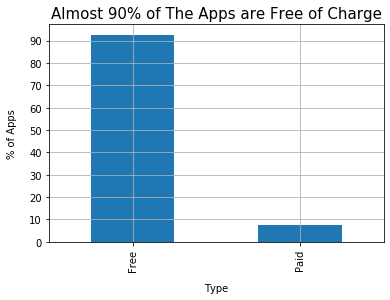

In [35]:
#Drawing bar chart for free/paid apps.
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

apps_per_type=final_google_play['Type'].value_counts(normalize=True)*100
apps_per_type.plot.bar()
plt.xlabel("Type", labelpad=12)
plt.ylabel("% of Apps", labelpad=12)
plt.yticks(np.arange(0, 100, 10))
plt.grid(True)
plt.title("Almost 90% of The Apps are Free of Charge",fontsize=15, y=1.00)
plt.show()

Most of the apps in our dataset don't require payment while installing. It's hard to convince users to pay for an app in advance ,since they haven't tried it yet. Once user is engaged with the app and enjoys it, he ,most likely, will want to pay for extra features.

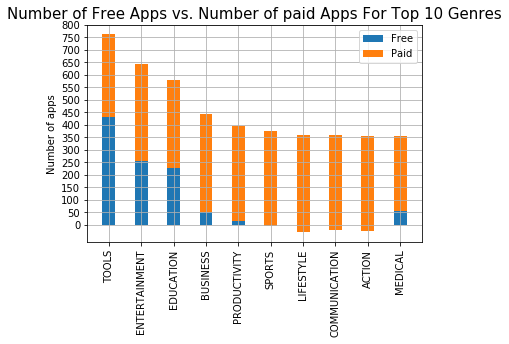

In [36]:
#Number of free apps vs. number of paid apps per top 10 genres
N = 10
genres_per_type=pd.pivot_table(final_google_play, values='App', index=final_google_play['Final_Genre'],columns=['Type'], aggfunc='count')
genres_per_type=genres_per_type.sort_values(by=['Free'],ascending=False)[:N]

ind = np.arange(N)    # the x locations for the groups
width = 0.4       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, genres_per_type['Free'], width)
p2 = plt.bar(ind, genres_per_type['Paid'], width,bottom=genres_per_type['Free'])

plt.ylabel('Number of apps')
plt.title('Number of Free Apps vs. Number of paid Apps For Top 10 Genres', fontsize=15)
plt.xticks(ind, genres_per_type.index, rotation=90)
plt.yticks(np.arange(0, 850, 50))
plt.grid(True)
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))
plt.show()

It looks like users are willing to pay for apps from top 3 genres (Tools, Enterainment and Education).<br>
In our dataset, around 60% of Tools' apps and 40% of Entertainment & Education apps are paid.<br>
We can use this information for suggesting features as part of in-app purchases in free apps or alternatively provide improved features for in-advance payment. <br>
In-app purchasing refers to buying extra content or subscriptions inside an application on a mobile device. 
Free apps are more likely to have in-app purchases feature. <br>

In [37]:
#Create new column with installs' bins for display reasonable categories in a chart
final_google_play['Installs_bins'] = pd.cut(x=final_google_play['Installs'], bins=[10**i for i in range(0,10)], labels=['0-10','10-100','100-1k','1k-10k','100k-1M','1M-10M','10M-100M','100M-1B','1B-10B'])

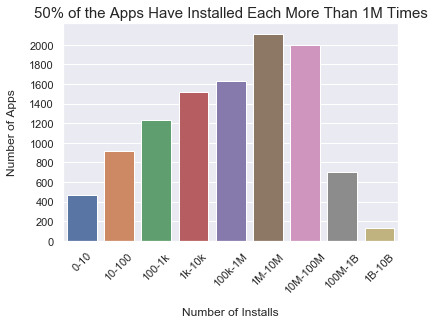

In [38]:
#Display bar chart of installs' bins
sns.set(style="darkgrid")
ax = sns.countplot(x="Installs_bins", data=final_google_play)
plt.xticks(rotation=45)
plt.xlabel("Number of Installs", labelpad=12)
plt.ylabel("Number of Apps", labelpad=12)
plt.yticks(np.arange(0, 2200, 200))
plt.title("50% of the Apps Have Installed Each More Than 1M Times", fontsize=15, y=1.00)
plt.show()

Since the installs have a very large scale (from 0 to 10B), we splited its wide range into 10-powers bins.
Each app will belong to its relevant bin. <br>
In our dataset, 12% of the apps have been downloaded each fewer than 100 times, and about 50% of the apps have been downloaded more than 1M times.<br>
If development team wants to measure success of their own app, we suggest them to aim for at least 1M installs.  

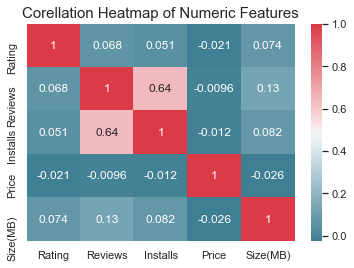

In [39]:
#Correlation heatmap of features
ax = plt.axes()
corr = final_google_play.corr()
sns.heatmap(corr, xticklabels=corr.columns, annot=True ,yticklabels=corr.columns,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.set_title('Corellation Heatmap of Numeric Features', fontsize=15)
plt.show()

We can see the reviews have high correlation (0.64) with installs.<br>
Surprisingly price has no correlation with other features, including installs and reviews.<br>

In [40]:
#List the top 5 genres of Which Their Apps Were Most-Installed
installs_per_genre=final_google_play.groupby('Final_Genre')['Installs'].sum()
installs_per_genre=installs_per_genre.sort_values(ascending=False)[:5]
print("Top 5 Genres of Which Their Apps Were Most-Installed:\n")
for counter, value in enumerate(installs_per_genre):
    print("{0} Genre has {1:,.0f}B Installs".format(installs_per_genre.index[counter],value/10**9))

Top 5 Genres of Which Their Apps Were Most-Installed:

COMMUNICATION Genre has 33B Installs
PRODUCTIVITY Genre has 14B Installs
SOCIAL Genre has 14B Installs
TOOLS Genre has 11B Installs
ARCADE Genre has 11B Installs


At the first place, we have communication apps with 33B installs such as: Whatsapp and Gmail.<br>

For beyond, We see that productivity ("GoogleDrive" & "MS-Word") and social apps ("Facebook","Instagram" and 'Snapchat") have each about 14B installs for their genres.<br>

Apps from Tools("Google Translate"), arcade("Subway Surfers") are also popluar and have each about 11B installs.<br>

Further exploration of apps per genre will be done in future project ,subjected to request of development team.<br>

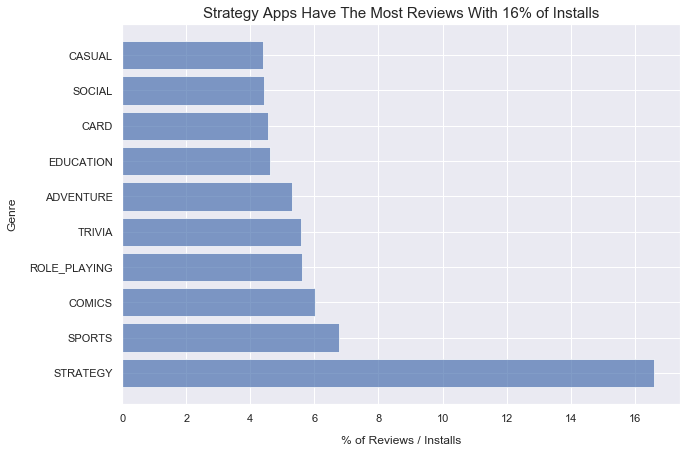

In [41]:
#Bar chart of number of reviews as percent of installs per genre
reviews_per_genre=final_google_play.groupby('Final_Genre')['Installs','Reviews'].sum()
reviews_per_genre['Reviews_Percent']=(reviews_per_genre['Reviews']/reviews_per_genre['Installs'])*100
reviews_per_genre=reviews_per_genre.sort_values(by=['Reviews_Percent'],ascending=False)[:10]
plt.figure(figsize=(10,7))
plt.barh(reviews_per_genre.index, reviews_per_genre['Reviews_Percent'],align='center', alpha=0.7)
plt.xlabel("% of Reviews / Installs", labelpad=12)
plt.ylabel("Genre", labelpad=12)
plt.title("Strategy Apps Have The Most Reviews With 16% of Installs",fontsize=15, y=1.00)
plt.show()

It's clear that strategy games get more reviews than any other genre (about 16% of its total installs). <br>
That's because this kind of apps involve lots of technical and experiential features, hence users tend to share their opinions how to improve them while walking-through.<br>

In general, It seems that only a small number of users take the time to write an app review. <br>
On average, around 6% of users who download an app write reviews in the Google Play Store. <br>
Our analysis has shown that users tend to leave more reviews for apps in sports, comics, role-playing and trivia genres.

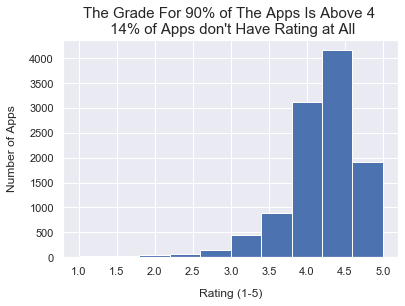

In [42]:
# Histogram of apps' rating
plt.hist(final_google_play['Rating'], 10)
plt.xlabel("Rating (1-5)", labelpad=12)
plt.ylabel("Number of Apps", labelpad=12)
plt.title("The Grade For 90% of The Apps Is Above 4 \n 14% of Apps don't Have Rating at All",fontsize=15, y=1.00)
plt.show()

Usually, users tend to give high grades for apps (4 out of 5 and above it). Nonetheless, we can't conclude for sure about the reasons for that. It depends on the experience of each user from the given app.

# Dealing With Outliers

Before we apply our model, we should handle the outliers we have in our dataset.

In [43]:
#Show statistics for numeric columns
final_google_play.describe()

,Rating,Reviews,Installs,Price,Size(MB)
count,10784.000000,1.078400e+04,1.078400e+04,10784.000000,10784.000000
mean,4.191821,4.464254e+05,1.554319e+07,0.993763,21.549068
std,0.479223,2.935183e+06,8.524278e+07,15.522142,20.763867
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008500
25%,4.100000,3.800000e+01,5.000000e+03,0.000000,5.900000
50%,4.200000,2.137000e+03,1.000000e+05,0.000000,18.000000
75%,4.500000,5.539175e+04,5.000000e+06,0.000000,26.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000


We can see that we have outliers in Price and Size columns because their max values are much higher than the mean. <br>
The distributions of installs and reviews expend on wide range and the median is 100 times fewer than the mean.<br>
Hence, we won't remove outliers from both columns because it might change dramatically the distributions.<br>
Let's look closer at box plots of Price and Size features. Once we see the extent of outliers, we will consider to drop them.

Number of Size Outliers :636 out of 10784


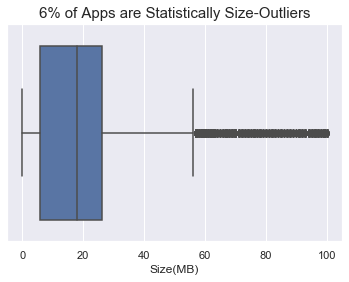

In [44]:
#Calculate number of statistic outliers for "Size" column
mean_size=final_google_play['Size(MB)'].mean()
std_size=final_google_play['Size(MB)'].std()
outliers_size=final_google_play['Size(MB)']>mean_size+std_size*2
print("Number of Size Outliers :"+str(sum(outliers_size))+" out of "+str(len(final_google_play)))

#Create boxplot for "Size" column
sns.boxplot(x=final_google_play['Size(MB)'])
plt.title("6% of Apps are Statistically Size-Outliers",fontsize=15, y=1.00)
plt.show()

Around 6% of apps are statistically size-outliers (above 60MB). <br>
Sometimes apps tend to use more storage due to a large number of features, but still memory isn't a big issue for most Android smart phones. <br>
Hence, the size ouliers are reasonable, and we will leave them as are.

Number of Price Outliers :29 out of 10784


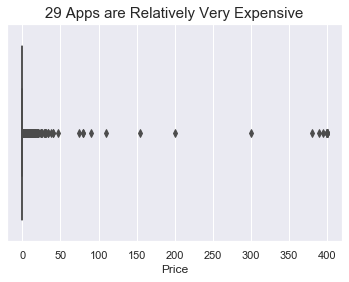

In [45]:
#Calculate number of statistic outliers for "Price" column
mean_size=final_google_play['Price'].mean()
std_size=final_google_play['Price'].std()
outliers_size=final_google_play['Price']>mean_size+std_size*2
print("Number of Price Outliers :"+str(sum(outliers_size))+" out of "+str(len(final_google_play)))

#Create boxplot for "Price" column
sns.boxplot(x=final_google_play['Price'])
plt.title("29 Apps are Relatively Very Expensive",fontsize=15, y=1.00)
plt.show()

The mean payment is 0.99 US dollar ,since most of the apps are free. <br>
We still have few apps with relatively high price (above 30$) hence outliers we will drop from our analysis.

In [46]:
#Drop apps with price outliers
final_google_play=final_google_play.drop(index=outliers_size[outliers_size].index)

In [47]:
#Remider of columns' types
final_google_play.dtypes

App              category
Rating            float64
Reviews             int32
Installs            int32
Type             category
Price             float64
Size(MB)          float64
Final_Genre      category
Installs_bins    category
dtype: object

Few last steps we need to do before applying our model:
* Creating dummy variables for the categorial features "Final_Genre" and "Type".<br>
* Removing "app" column because it has unique values and will bias our model.
* Removing "Installs_bin" column, because it's a duplicated column which was used only for the previous analysis, and not used for our model.
* Rescaling all of the columns to vary between 0 to 1, except the target variable ("Installs").<br> It will ensure that some features won't weight more than the others.<br>

In [48]:
#Create dummy columns for "Type" & "Final_Genre"
dummies=pd.get_dummies(final_google_play[['Final_Genre','Type']],prefix=['Genre', 'Type'])
#Prepare relevant columns for the model and drop "App" and "Installs_bins" columns
model_google_play=pd.concat([final_google_play[['Reviews','Rating','Installs','Price','Size(MB)']],dummies],sort=False,axis=1)

In [49]:
#Rescale all columns and saparate the dataset to features (x) and target variable (y)
actual_x=(model_google_play.drop(columns=['Installs'])-model_google_play.drop(columns=['Installs']).min())/(model_google_play.drop(columns=['Installs']).max()-model_google_play.drop(columns=['Installs']).min())
actual_y=model_google_play['Installs']
features=actual_x.columns

# Applying The Predictive Model

In our model, we will apply liniar regression model in order to predict the number of installs based on our given features. <br>

Firstly, we will split our dataset to train and test subsets ,with porpotions of 80%-20% respectively, and secondly we will use cross validation technique to prevent over-fitting of our model to the dataset .<br>

The training subset contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test subset in order to test our model’s prediction on this subset. <br>

Our goal is to find the optimal model parameter values that best describe the relationship between the feature columns and target column.<br>

We will evaluate our model performance by Root-Mean-Square Error (RMSE).

In [50]:
#Split the datasert to train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(actual_x, actual_y, test_size=0.2, random_state=1)

#Fit liniar regression model on our train set 
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

#Predict the installs of our test subset with the model. 
lr_predictions=lr.predict(X_test)

# Calculate the Root-Mean-Squared errors
from sklearn.metrics import mean_squared_error
from math import sqrt

lr_rmse = sqrt(mean_squared_error(y_test, lr_predictions))
print("Our initial model has RMSE equals to {0:,.0f}".format(lr_rmse))

Our initial model has RMSE equals to 55,855,824


We got an initial RMSE for our model, but we need to have in mind that model haven't been tested on other subsets.<br>
Hence, we will use cross validation technique to check whether our model can be applied to other subsets.

In [51]:
#Calculate average RMSE of Cross validtion with 5 folds
from sklearn.model_selection import cross_val_score
cross_val_lr_model=cross_val_score(lr, actual_x, actual_y, cv=5, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_val_lr_model) 
mean_cross_scores_corrected=np.mean(cross_scores_corrected)
print("Our model has RMSE equals to {0:,.1f} after using Cross-Validation".format(mean_cross_scores_corrected))

Our model has RMSE equals to 15,381,019,348,710,138.0 after using Cross-Validation


We got worse result for our model performance by the cross validation. This score is 275M times higher than the one of the original model. <br>
We have some options to execute:
1. Redcuing the number of selected features for our regression model.
2. Using another algorithm for our model (i.e. Random Forests).
3. Changing the number of folds as part of the cross validation process for our regression model.

We will focus on implementing the first and second options. <br>
For feature selection, we will use recursive feature elimination (RFE).

In [52]:
# Find the 5 top features based on RFE method.
from sklearn.feature_selection import RFE
number_of_features=5
rfe = RFE(lr, number_of_features)
rfe_results = rfe.fit(X_train, y_train)

#Sorting the coefficients by their ranking
def sortSecond(val): 
    return val[1]

coef_ranking=[]
for c, value in enumerate(features, 0):
    coef_ranking.append((features[c], rfe_results.ranking_[c]))

coef_ranking.sort(key = sortSecond, reverse = False)

#Print the selected features
print("Number of selected features: %s" % (rfe_results.n_features_))
print("These are the selected features: \n")
selected_features=[]

for element in coef_ranking[:number_of_features]:
    selected_features.append(element[0])
    print(element[0])

Number of selected features: 5
These are the selected features: 

Genre_ARCADE
Genre_CASUAL
Genre_COMMUNICATION
Genre_SOCIAL
Genre_VIDEO_PLAYERS_AND_EDITORS


In [53]:
#Fit liniar regression model on our train set with the selected features 
X_train, X_test, y_train, y_test = train_test_split(actual_x[selected_features], actual_y, test_size=0.2, random_state=2)
lr_reduced_features= LinearRegression()
lr_reduced_features.fit(X_train,y_train)

#Predict the installs of our test subset with the model. 
lr_reduced_features_predictions=lr_reduced_features.predict(X_test)

#Calculate average RMSE of Cross validtion with 5 folds
cross_val_lr_fs_model=cross_val_score(lr_reduced_features, actual_x[selected_features], actual_y, cv=5, scoring='neg_mean_squared_error')
cross_scores_corrected = np.sqrt(-1 * cross_val_lr_fs_model) 
mean_cross_scores_corrected=np.mean(cross_scores_corrected)
print("Our model with top selected features has RMSE equals to {0:,.0f}".format(mean_cross_scores_corrected))

Our model with top selected features has RMSE equals to 72,835,513


Feature selection improved dramaticly our model, while RMSE has been reduced from  1.53x10^16 to 7.2x10^7. <br>
We should notice that social & communication genres are very popular among the users in our dataset.<br>
Hence, we shouldn't be surprised from this finding.
Let's try to implement those features as part of Random Forest (RF) algorithm.

In [54]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf_seleted_features = RandomForestRegressor(n_estimators = 1000, random_state = 3)
# Train the model on training data
rf_seleted_features.fit(X_train[selected_features], y_train)
rf_seleted_features_predictions=rf_seleted_features.predict(X_test[selected_features])
rf_seleted_features_rmse = sqrt(mean_squared_error(y_test, rf_seleted_features_predictions))
print("Our Random-Forests model with top selected features has RMSE equals to {0:,.0f}".format(rf_seleted_features_rmse))

Our Random-Forests model with top selected features has RMSE equals to 80,900,433


We can see that our RF model doesn't perform better than the regression model. <br>
Possible reason for that is selecting features which explain linear relation to the target variable and using them also in RF model. This way we restricted the RF to take other features that may perform better.

# Conclusions

During our project, we made analysis about 10,000 Google-Play apps and explored by liniar regression & random forest models how we can predict the number of installs for each app based on its features.

We reached the following conclusions:

- Although 90% of apps are free of charge, users tend to pay for apps from genres Tools, Entertainment and Education.<br>
- 50% of apps were installed each more than 1M times. We suggest our development team to aim for installing their app 1M or more times in order to define the success of app. <br>
- The most popular genres are: Communication, Productivity, Social, Tools and Arcade.
- Strategy gemes are the most reviewed among all genres.
- On average, around 6% of users who download an app write reviews in the Google Play Store.
- Liniar regression algorithm with certain genres as features has the best performance while predicting the apps' installs among the examined alternatives.

Below some suggestions for future projects:

* Building clusters for potential users may install our app based on personal features. 

* Investigating the reaction of users to apps using two alternatives:<br>
A. Suggesting them features as part of in-app purchases in free apps.<br>
B. Suggesting them improved features as part of in-advance payment before app installation.<br>

* Exploring for key words in review contents to understand the experience of users. 

Now it's the time to send the results to the development team ,so they can consider our findings to take the best decision.